In [5]:
dataset_name = "W19_comb"
df_list = 'BES_Panel'

# 'BES_Panel|BES_reduced'
#           ]#,"BESnumeric"]

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

Toggle code

In [6]:
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)

var_type (8079, 14)


In [7]:
# get full set of inferred "cross wave" auth-lib/left-right values and ages
pan_dataset_allr_values = pd.read_csv(BES_small_data_files + "pan_dataset_allr_valuesW19"+".csv")
pan_dataset_ages = pd.read_csv( BES_small_data_files + "pan_dataset_ages"+".csv" )
pan_dataset_votes = pd.read_pickle(BES_small_data_files + "pan_dataset_votes"+".zip", compression='zip')


pan_dataset_allr_values = pan_dataset_allr_values.set_index("id")


In [6]:
# (df_simp_imp[results_df[ (results_df["err_dist"]<.02) & (results_df["balanced_acc"]>.5) ]["target_var"]]).to_pickle(BES_small_data_files + "imputed_data3"+".zip", compression='zip')

In [7]:
df_simp_imp = pd.read_pickle(BES_small_data_files + "imputed_data3"+".zip", compression='zip')

In [9]:
# (df_simp_imp=="Don't know").sum().sort_values()
# no DKs!
# df_simp_imp.dtypes.value_counts()
# all category variables

category    106
category     15
category     12
category      9
category      8
category      4
category      3
category      3
category      2
category      1
category      1
category      1
category      1
category      1
dtype: int64

In [12]:
from sklearn.metrics import davies_bouldin_score

In [33]:
df_simp_imp["competitiveness1W19"].value_counts()

Kind     95006
Tough     2000
Name: competitiveness1W19, dtype: int64

In [32]:
BES_Panel["competitiveness1W19"].value_counts()

Kind          7194
Don't know     476
Tough          456
Name: competitiveness1W19, dtype: int64

In [ ]:
## real signs of struggle with those super unbalanced sets!

In [27]:
X.var().sort_values()

competitiveness2W19     0.005577
competitiveness4W19     0.008949
competitiveness1W19     0.020192
childvalues_8W14        0.065221
childvalues_10W14       0.115473
                         ...    
redistSelfW18          10.730314
redistSelfW17          10.884398
discrimWhiteW14        10.902696
redistSelfW11          11.043701
redistSelfW1           11.353879
Length: 167, dtype: float64

In [24]:
pd.Series( [var_type.loc[x,"type"] for x in df_simp_imp.columns] ).value_counts()

## okay - we really can just turn them straight into position values

1    167
dtype: int64

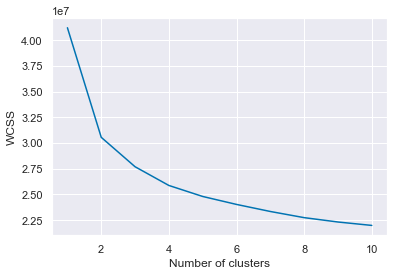

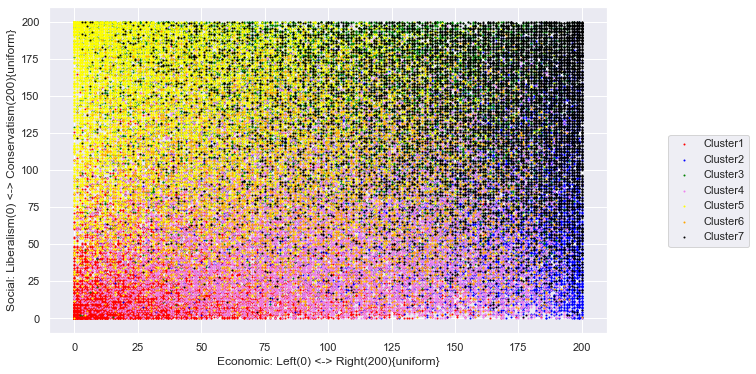

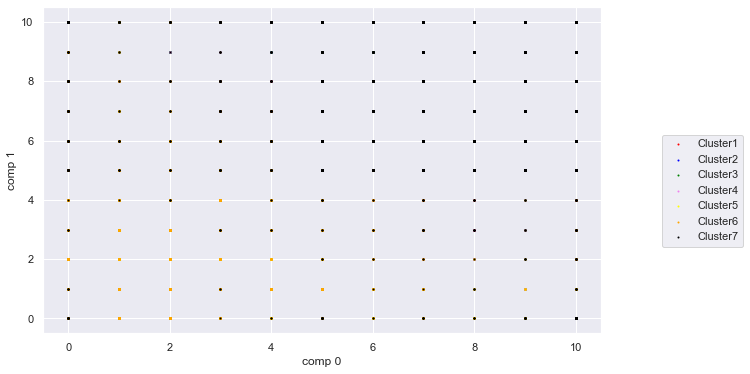

Wall time: 58.7 s


3    18778
2    17372
4    14811
0    14536
1    13113
6    11079
5     7317
dtype: int64

In [16]:
%%time
n_clusters = 7


# X = df_simp_imp
X = df_simp_imp.apply(lambda x: x.cat.codes)
#.apply(lambda x: x.cat.codes if x.dtype=='category' else x)

values_x = pan_dataset_allr_values.columns[0]
values_y = pan_dataset_allr_values.columns[1]
value_df = pan_dataset_allr_values.loc[X.index]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# X.columns = [0,1]
# X = X.values

kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", random_state = 42)
y = kmeans.fit_predict(X)

colour_list=  ['red','blue','green','violet','yellow','orange','black']

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(value_df.loc[y == cluster, values_x], value_df.loc[y == cluster, values_y],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel(pan_dataset_allr_values.columns[0])
plt.ylabel(pan_dataset_allr_values.columns[1])
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(X.loc[y == cluster, X.columns[0]], X.loc[y == cluster, X.columns[1]],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel("comp 0")
plt.ylabel("comp 1")
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.show()
pd.Series(y).value_counts()

NameError: name 'davies_bouldin_score' is not defined

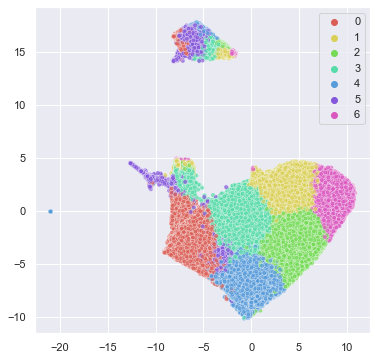

In [11]:
%%time
import pacmap

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=88+2, MN_ratio=0.6187685212521202,
                          FP_ratio=2.2091940784070223, apply_pca=True) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X_test.values, init="random")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.scatter(X_transformed[:, 0], X_transformed[:, 1],
#            cmap="Spectral",
#            c=y_test, s=0.6)
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1],
#            cmap="Spectral",
           palette=sns.color_palette("hls", 7),
           hue=y_test, s=20,alpha=.7)

print(davies_bouldin_score(X_transformed, y_test))

In [13]:
print(davies_bouldin_score(X_transformed, y_test))

1.291703738812199


2.0123748066117586
Wall time: 6min 2s


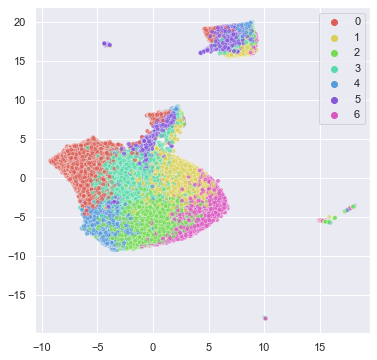

In [15]:
%%time
import pacmap

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=88+2, MN_ratio=0.6187685212521202,
                          FP_ratio=2.2091940784070223, apply_pca=True) 

X_test_std = StandardScaler().fit_transform(X_test)
# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X_test_std, init="random")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.scatter(X_transformed[:, 0], X_transformed[:, 1],
#            cmap="Spectral",
#            c=y_test, s=0.6)
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1],
#            cmap="Spectral",
           palette=sns.color_palette("hls", 7),
           hue=y_test, s=20,alpha=.7)

print(davies_bouldin_score(X_transformed, y_test))

In [ ]:
## too slow for testing, run on subset!

In [60]:
X_train_ind, X_test_ind, y_train, y_test = train_test_split(BES_Panel.index, y, test_size=0.05, random_state=42, stratify=y)
# X_test = pd.DataFrame(X_red,index=BES_Panel.index).loc[X_test_ind]

X_train = X.loc[X_train_ind]
X_test = X.loc[X_test_ind]

1.380474694488815
Wall time: 12.9 s


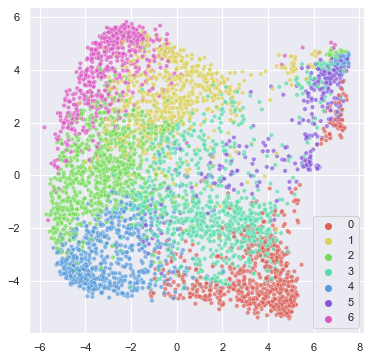

In [37]:
%%time
import pacmap

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=88+2, MN_ratio=0.6187685212521202,
                          FP_ratio=2.2091940784070223, apply_pca=True) 

X_test_std = StandardScaler().fit_transform(X_test)
# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X_test_std, init="random")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.scatter(X_transformed[:, 0], X_transformed[:, 1],
#            cmap="Spectral",
#            c=y_test, s=0.6)
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1],
#            cmap="Spectral",
           palette=sns.color_palette("hls", 7),
           hue=y_test, s=20,alpha=.7)

print(davies_bouldin_score(X_transformed, y_test))

In [40]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def hyperopt_train_test(params):
    
    embedding = pacmap.PaCMAP(**{k:v for k,v in params.items() if "init" not in k})

# fit the data (The index of transformed data corresponds to the index of the original data)
    X_transformed = embedding.fit_transform(X_test.values, init=params["init"])
    
    return davies_bouldin_score(X_transformed, y_test)

space4knn = {
#     'n_neighbors': hp.choice('n_neighbors', range(1,50))
    'n_components': 2,
    'n_neighbors':hp.choice('n_neighbors', range(2,150)),
    'MN_ratio':hp.uniform('MN_ratio', .15, .85),
    #0.5,
    'FP_ratio':hp.uniform('FP_ratio', 1.25, 3.0),
#     'apply_pca':True,
    'apply_pca':hp.choice('apply_pca', [True,False]),
    'lr':hp.uniform('lr', .5, 1.5),
#     1.0,
#     'init':'pca',
    
    'init':hp.choice('init', ['pca','random']),
    
    
}
def f(params):
    clusteringness = hyperopt_train_test(params)
    return {'loss': clusteringness, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=150, trials=trials)
print('best:')
print(best)

100%|██████████████████████████████████████████████| 150/150 [29:03<00:00, 11.62s/trial, best loss: 0.8866598764444021]
best:
{'FP_ratio': 2.6105411700522474, 'MN_ratio': 0.4313108811895139, 'apply_pca': 1, 'init': 0, 'lr': 1.080342470192178, 'n_neighbors': 69}


ValueError: arrays must all be same length

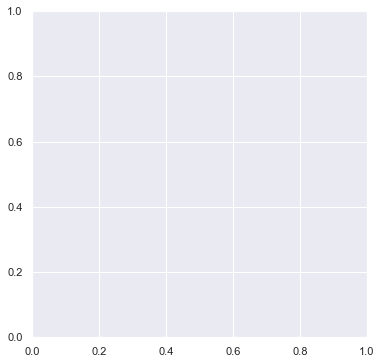

In [41]:
# %%time
import pacmap

# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=69+2, MN_ratio=0.4313108811895139,
                          FP_ratio=2.6105411700522474, apply_pca=True, lr=1.080342470192178) 

X_std = StandardScaler().fit_transform(X)
# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X_std, init="pca")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# ax.scatter(X_transformed[:, 0], X_transformed[:, 1],
#            cmap="Spectral",
#            c=y_test, s=0.6)
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1],
#            cmap="Spectral",
           palette=sns.color_palette("hls", 7),
           hue=y, s=20,alpha=.7)

print(davies_bouldin_score(X_transformed, y))

2.346752447946417


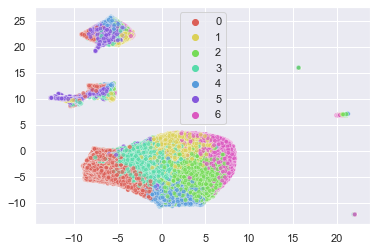

In [44]:
sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1],
#            cmap="Spectral",
           palette=sns.color_palette("hls", 7),
           hue=y, s=20,alpha=.7)

print(davies_bouldin_score(X_transformed, y))

In [45]:
## not so happy with pacmap!
import umap
import trimap

3.629904342195069
Wall time: 1min 33s


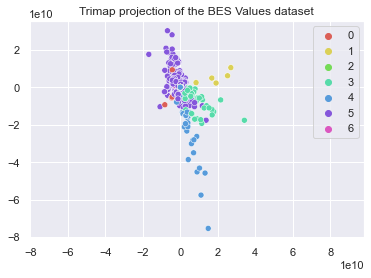

In [70]:
%%time
# {'distance': 0, 'lr': 0.6693581495232805, 'n_inliers': 15.0, 'n_outliers': 1.0,
#  'n_random': 4.0, 'standardization': 0, 'weight_temp': 0.0739833629830095}

# X_std = StandardScaler().fit_transform(X_test)
embedding = trimap.TRIMAP()\
                    .fit_transform(X)
#distance='euclidean',lr=.67,n_inliers=15,n_outliers=1,n_random=4,weight_temp=.07

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                hue=y,
                palette=sns.color_palette("hls", n_clusters)).set(title="Trimap projection of the BES Values dataset") 

plt.gca().set_aspect('equal', 'datalim')
print(davies_bouldin_score(embedding, y))

In [65]:
# pd.DataFrame(embedding).dropna()

In [ ]:
## remember, it is running on more data!

# we should try some manual factor analysis/pca

In [ ]:
### so, to try to replicate More In Common segmentation we need to try to approx their variables!

In [ ]:

# Young people today don't have enough respect for traditional British values
# People who break the law should be given harsher/ stiffer sentences
# Government should redistribute income from the better off to those who are less well off
# Ordinary working people get their fair share of the nation's wealth
# There is one law for the rich and one for the poor
# Management will always try to get the better of employees if it gets the chance

### ### near exact analogues, but don't seem to have full set!
### all standard lr vars *except 'big business'



# Compassion for those who are suffering is the most important virtue in a person
# I would call some acts wrong on the grounds that they are unnatural
# Men and women each have different roles to play in society
# When the government makes laws, the number one principle should be ensuring that everyone is treated fairly

### genderRoles, close match prob gayMarriage??? for 'natural'
## they have one question, which seems to line up *ish* with *all* the sdo questions!


# Please say how well the following statements reflect your views using the scale below, where 4 means you agree completely with the first statement, and 1 means you agree completely with the second statement:
# People are largely responsible for their own outcomes in life 4
# 	- People’s outcomes in life are determined largely by forces outside of their control 1

# How much control do you feel most people have over the way their life turns out? People who work hard can find success no matter what situation they were born into 4
# 	- Some people’s situations are so challenging that no amount of work will allow them to find success 1

# Which of the following played a greater role in getting you where you are today? 4 - Hard work and effort
# 	1 - Luck and circumstance

### locus1, locus2, reasonForUnemployment (bit specifically economic, but does have 'no fault of their own' wording)


# For the following pair of traits, which one you think is more important for a child to have using the scale below, where 1 means it is much more important for them to have the first trait, and 4 means it is much more important for them to have the second trait.
# 	1 - Independence, 4 - Respect for elders
# 	1 - Obedience, 4 - Self-reliance
# 	1 - Well-behaved, 4 - Creative
# 	1 - Curiosity, 4 - Good manners
### near exact analogues

####< Threat Perceptions >
# The world is becoming a more and more dangerous place (4pt likert)
# The area where I live is becoming a more and more dangerous place 	(4pt likert)
#### struggling to find anything close to think - maybe harkBack?


# Which do you agree with more?
# These days, we seem to care more about immigrants than about British citizens
# 	/I think we care equally about everyone, regardless of their immigration status
# 	/These days, we still care more about British citizens than about immigrants.
#### no direct immig variable, but really any would do, might as well pick one with decent coverage! immigSelf or immigCultural
#### could interpret as "immigrantsWelfareState"


# These days, we seem to give an advantage to women over men.
# 	/These days, neither men nor women have an advantage over the other.
# 	/These days, men still have advantages over women.
#### either a fiddly bit of comparison between discrimMen and discrimWomen - or just femaleEquality

# Here is a list of activities that some people get a chance to participate in and others don’t. Which of the following have you taken part in in the past year?
# #  	Yes	No
# # Attended a protest, rally, or march		
# X
# # Donated money to a campaign group or political organisation		
# X
# # Donated to charity		
# # Volunteered in my local community		
# # Signed a petition		
# X
# # Shared political content on social media		
# X
# # Voted in a local election		
# X
# # Donated blood		
# # Donated money to my place of worship		


# # participation_1, participation_2, ~~participation_3, participation_6, polSocMedia, nonelecParticipation
# # localTurnout,localTurnoutRetro -> harmonised!

# - weak proxies: strongestConnection, churchAttendance

In [26]:
# search(BES_Panel,"participation_1")

nonelecParticipation_1W6    30257
participation_1W18          37825
participation_1W19          32177
dtype: int64

In [ ]:
## we need to get a full list, we can filter/imputer

## lr1,lr3,lr4,lr5,al1,al5 (al3 matches one from another section) ***
## genderRoles, gayMarriage 30k
## pick highest variance sdo question for 'fairness' 7k -> DROP}
##  locus1, locus2, reasonForUnemployment (24+7k,30k multiple)
## auth1,auth2,auth3,auth4,auth5 (or long versions) (childvalues if needed for imputation!) 7k mult waves
## harkBack (closes to 'threat'!) 30k mult waves
## immigSelf/immigCultural/immigrantsWelfareState (30k mult waves)/immigContributeTake
## femaleEquality (discrimWomen/discrimMen) - femaleEquality much better
## participation_1, participation_2, ~~participation_3, participation_6, polSocMedia, nonelecParticipation
    # participation = W18,W19, nonelecParticipation = W6


In [90]:
# pan_dataset_votes[search(pan_dataset_votes,"LE_complete",case_sensitive=True).index].stack().value_counts().index

Index(['UNK', 'CNV', 'DNV', 'LAB', 'CON', 'TYTV(Maybe)', 'TYTV(Def)', 'LD',
       'UKIP', 'OTH', 'GP', 'Not Present', 'SNP', 'DK', 'PC', 'BNP'],
      dtype='object')

In [ ]:
# nonelecParticipation_
# 1 □ Contacted a politician, government or local government official?
# nonelecParticipation_
# 2 □ Signed a petition on the Internet?
# nonelecParticipation_
# 3 □ Signed a petition not on the internet?
# nonelecParticipation_
# 4 □ Done any work on behalf of a political party or action group?
# nonelecParticipation_
# 5 □ Given any money to a political party, organization or cause?
# nonelecParticipation_
# 6 □ Taken part in a public demonstration?
# nonelecParticipation_
# 7 □ Bought – or refused to buy – any products for political or ethical reasons?
# nonelecParticipation_
# 8 □ Gone on strike or taken industrial action?
# 0 □ None of these Exclude other punches
# nonelecParticipation_
# 99 □ Don’t know Exclude other punches

# participation_1 Done any work on behalf of a political party or action group
# -> 4 non_elec
# participation_2 Given any money to a political party, organization or cause
# -> 5 non_elec
# participation_3 Displayed an election poster
# X
# participation_4 Listened to or watched a party election broadcast
# X
# participation_5 Read a campaign leaflet/letter, text message or email from a political party
# X
# participation_6 Tried to persuade somebody which party they should vote for
# X

In [ ]:
# participation_1, nonelecParticipation_4
# participation_2, nonelecParticipation_5
# nonelecParticipation_2
# nonelecParticipation_3
# nonelecParticipation_6


In [63]:
# BES_Panel[
# search(BES_Panel,"genderRoles|gayMarriage")
# ]#.stack().value_counts()

gayMarriageW10    30237
genderRolesW10    30237
dtype: int64

In [ ]:
# BES_Panel["polSocMediaW19"]

In [49]:
# auth5 = amalgamate_waves(BES_Panel,"auth5",low_priority_values=[9999.0])

In [17]:
%%time
replace_dict = {'UNK':np.nan, 'CNV':np.nan, 'DNV':False, 'LAB':True, 'CON':True, 'TYTV(Maybe)':np.nan, 'TYTV(Def)':np.nan,
                 'LD':True, 'UKIP':True, 'OTH':True, 'GP':True, 'Not Present':np.nan,
                 'SNP':True, 'DK':np.nan, 'PC':True, 'BNP':True}

voted_in_le = pan_dataset_votes[search(pan_dataset_votes,"LE_complete",case_sensitive=True).index].replace(replace_dict).any(axis=1)

internet_petition = BES_Panel["nonelecParticipation_2W6"].replace("Don't know",np.nan)
non_internet_petition = BES_Panel["nonelecParticipation_3W6"].replace("Don't know",np.nan)
public_demonstration = BES_Panel["nonelecParticipation_6W6"].replace("Don't know",np.nan)
polSocMedia = BES_Panel["polSocMediaW19"].replace("Don't know",np.nan)

genderRoles = BES_Panel["gayMarriageW10"].replace("Don't know",np.nan)
gayMarriage = BES_Panel["genderRolesW10"].replace("Don't know",np.nan)

participation_1 = amalgamate_waves(BES_Panel,"participation_1",low_priority_values=["Don't know"])
participation_2 = amalgamate_waves(BES_Panel,"participation_2",low_priority_values=["Don't know"])

participation_1 = participation_1.replace("Don't know",np.nan)
participation_1 = participation_1.cat.as_ordered()
work_for_party_action_group = BES_Panel["nonelecParticipation_4W6"].replace("Don't know",np.nan)
work_for_party_action_group.loc[work_for_party_action_group.isnull()] = participation_1.loc[work_for_party_action_group.isnull()]

participation_2 = participation_2.replace("Don't know",np.nan)
participation_2 = participation_2.cat.as_ordered()
donate_money_to_pol_group = BES_Panel["nonelecParticipation_5W6"].replace("Don't know",np.nan)
donate_money_to_pol_group.loc[donate_money_to_pol_group.isnull()] = participation_2.loc[donate_money_to_pol_group.isnull()]

femaleEquality = amalgamate_waves(BES_Panel,"femaleEquality",low_priority_values=["Don't know"])

immigrantsWelfareState = amalgamate_waves(BES_Panel,"immigrantsWelfareState",low_priority_values=["Don't know"])

harkBack = amalgamate_waves(BES_Panel,"harkBack",low_priority_values=["Don't know"])

locus1 = amalgamate_waves(BES_Panel,"locus1",low_priority_values=["Don't know"])

auth2 = amalgamate_waves(BES_Panel,"auth2",low_priority_values=["Don't know"])
auth4 = amalgamate_waves(BES_Panel,"auth4",low_priority_values=["Don't know"])

auth3 = amalgamate_waves(BES_Panel,"auth3",low_priority_values=["Don't know"])
auth1 = amalgamate_waves(BES_Panel,"auth1",low_priority_values=["Don't know"])

locus2 = amalgamate_waves(BES_Panel,"locus2",low_priority_values=["Don't know"])
reasonForUnemployment = amalgamate_waves(BES_Panel,"reasonForUnemployment",low_priority_values=["Don't know"])
# lr1,lr3,lr4,lr5,al1,al5
lr1 = amalgamate_waves(BES_Panel,"lr1",low_priority_values=["Don't know"])
lr3 = amalgamate_waves(BES_Panel,"lr3",low_priority_values=["Don't know"])
lr4 = amalgamate_waves(BES_Panel,"lr4",low_priority_values=["Don't know"])
lr5 = amalgamate_waves(BES_Panel,"lr5",low_priority_values=["Don't know"])
al1 = amalgamate_waves(BES_Panel,"al1",low_priority_values=["Don't know"])
al5 = amalgamate_waves(BES_Panel,"al5",low_priority_values=["Don't know"])

internet_petition = BES_Panel["nonelecParticipation_2W6"].replace("Don't know",np.nan)
non_internet_petition = BES_Panel["nonelecParticipation_3W6"].replace("Don't know",np.nan)
public_demonstration = BES_Panel["nonelecParticipation_6W6"].replace("Don't know",np.nan)
# polSocMedia = BES_Panel["polSocMediaW19"].replace("Don't know",np.nan)

Amalgamating variables: 
{18: 'participation_1W18', 19: 'participation_1W19'} ['participation_1W18', 'participation_1W19']
Amalgamating variables: 
{18: 'participation_2W18', 19: 'participation_2W19'} ['participation_2W18', 'participation_2W19']
Amalgamating variables: 
{15: 'femaleEqualityW15', 16: 'femaleEqualityW16', 17: 'femaleEqualityW17', 1: 'femaleEqualityW1_W5', 6: 'femaleEqualityW6_W14'} ['femaleEqualityW1_W5', 'femaleEqualityW6_W14', 'femaleEqualityW15', 'femaleEqualityW16', 'femaleEqualityW17']
Amalgamating variables: 
{1: 'immigrantsWelfareStateW1', 2: 'immigrantsWelfareStateW2', 3: 'immigrantsWelfareStateW3', 4: 'immigrantsWelfareStateW4', 7: 'immigrantsWelfareStateW7', 8: 'immigrantsWelfareStateW8', 10: 'immigrantsWelfareStateW10', 11: 'immigrantsWelfareStateW11'} ['immigrantsWelfareStateW1', 'immigrantsWelfareStateW2', 'immigrantsWelfareStateW3', 'immigrantsWelfareStateW4', 'immigrantsWelfareStateW7', 'immigrantsWelfareStateW8', 'immigrantsWelfareStateW10', 'immigrantsWe

In [10]:
# search(df_simp_imp,"femaleEquality|discrimWomen|discrimMen|participation|nonelecParticipation")

In [11]:
# search(df_simp_imp,"harkBack|immigSelf|immigCultural|immigrantsWelfareState|immigContributeTake")

In [12]:
# search(df_simp_imp,"auth1|auth2|auth3|auth4|auth5")

In [13]:
# search(df_simp_imp,"genderRoles|gayMarriage|locus1|locus2|reasonForUnemployment")

In [14]:
# search(df_simp_imp,"al1|al5|lr1|lr3|lr4|lr5")

In [30]:
df = pd.concat([lr1,lr3,lr4,lr5,al1,al5,locus1,locus2,reasonForUnemployment,auth1,auth2,auth3,auth4,
          harkBack,immigrantsWelfareState,femaleEquality,genderRoles,gayMarriage,
          internet_petition,non_internet_petition,public_demonstration],axis=1)

In [31]:
df.isnull().sum().sort_values()


lr4W1&6&7&10&13&14&16&17                     3067
al5W1&6&7&10&13&14&16&17                     3356
lr3W1&6&7&10&13&14&16&17                     3512
al1W1&6&7&10&13&14&16&17                     3598
lr5W1&6&7&10&13&14&16&17                     3633
lr1W1&6&7&10&13&14&16&17                     3949
femaleEqualityW1&6&15&16&17                  5047
immigrantsWelfareStateW1&2&3&4&7&8&10&11    31697
reasonForUnemploymentW1&2&3&4&7             47507
harkBackW7&10&11                            50406
genderRolesW10                              67332
nonelecParticipation_2W6                    67732
nonelecParticipation_6W6                    67732
nonelecParticipation_3W6                    67732
gayMarriageW10                              67789
locus1W8&9                                  70926
locus2W8&9                                  70969
auth4W7&10&11&14&19                         79543
auth2W7&10&11&14&19                         79742
auth1W7&10&11&14&19                         79951


In [20]:
# df.drop(["polSocMediaW19",],axis=1).notnull().all(axis=1).sum()

In [32]:
df_num = df.dropna().apply(lambda x: x.cat.codes)

In [107]:
## weird - auth3 not in wave 19!

In [92]:
# (df[search(df,"nonelec").index].dropna()=="Yes").sum()

nonelecParticipation_2W6    12374
nonelecParticipation_3W6     3002
nonelecParticipation_6W6     1265
dtype: int64

In [84]:
df_num["nonelecParticipation_6W6"].sum()

108

In [82]:
df_num.var().sort_values()

# nonelecParticipation_6W6,nonelecParticipation_3W6 -> maybe worth ditching for low variance!

nonelecParticipation_6W6                    0.034417
nonelecParticipation_3W6                    0.083163
auth3W7&10&11&14                            0.182721
auth2W7&10&11&14&19                         0.208723
nonelecParticipation_2W6                    0.238798
auth1W7&10&11&14&19                         0.245337
auth4W7&10&11&14&19                         0.249023
locus2W8&9                                  0.479443
reasonForUnemploymentW1&2&3&4&7             0.857247
femaleEqualityW1&6&15&16&17                 0.862448
locus1W8&9                                  0.952302
lr3W1&6&7&10&13&14&16&17                    0.972222
lr5W1&6&7&10&13&14&16&17                    0.984268
al5W1&6&7&10&13&14&16&17                    1.000623
lr4W1&6&7&10&13&14&16&17                    1.041931
genderRolesW10                              1.057466
harkBackW7&10&11                            1.183692
al1W1&6&7&10&13&14&16&17                    1.241132
lr1W1&6&7&10&13&14&16&17                    1.

In [ ]:
# Index of political ideology
# (10 measures):
# Left-right economic battery [5]
# Libertarian-authoritarian battery [5]
### lr_scale/al_scale


# Core Beliefs
# (24 measures):
# Moral Foundations Theory [10]
### Care (compassion for suffering/hurt a defenceless animal) -> empathy/group empathy
### fairness (every should be treated fairly/justice important for society) -> sdodominance/sdoantiegal
##### (BES questions emphasise groups!)
### authority (children need to learn respect/men and women each have diff roles) -> al3 v close/genderRoles
### loyalty (proud country's history/loyal to family members even if they do smth wrong) britishPride/???
### purity (people should not do things that are disgusting even if no one is harmed/some acts wrong because unnatural)
    ## BES not great for this - abortion only q to use 'wrong',Incremental3 (ref morals)


# Parenting style and authoritarianism [4]
# auth1 = respect for elders vs indep, auth2 = obedience vs self-reliance
# auth3=considerate vs well-behaved (creative in MiC), auth4= curiosity vs good manners
# auth5= orderly vs imaginative
# -> also 'childvalues_X'


# Victimhood [5]
# Agency and responsibility [3]
## locus1, locus2


# Threat perception [2]
### 'The segments differ on the safety or danger they perceive in their local area and the wider world.'
# "The world is becoming a more dangerous place"

### can't thinkl of anything close, maybe tolUncertainty?

# Democratic participation
# (1 measure)

In [13]:
pd.Series([re.match("(.*)W\d\d?",x).groups()[0] for x in search(BES_Panel,"immig").index]).value_counts().head(50)

immigEcon                        13
immigCultural                    13
changeImmig                      12
achieveReduceImmigNone           11
achieveReduceImmigCon            11
immigGreen                       11
immigCon                         11
achieveReduceImmigLD             11
achieveReduceImmigGrn            11
achieveReduceImmigSNP            11
immigSelf                        11
achieveReduceImmigPC             11
immigLab                         11
achieveReduceImmigLab            11
immigLD                          11
immigSNP                         11
immigPC                          11
immigUKIP                        10
effectsEUImmigration              9
controlImmig                      9
achieveReduceImmigUKIP            9
immigrantsWelfareState            8
labPriorities_immig               7
ldPriorities_immig                7
conPriorities_immig               7
changeImmigLab                    6
govtHandleImmig                   6
labHandleImmig              

Wall time: 562 ms


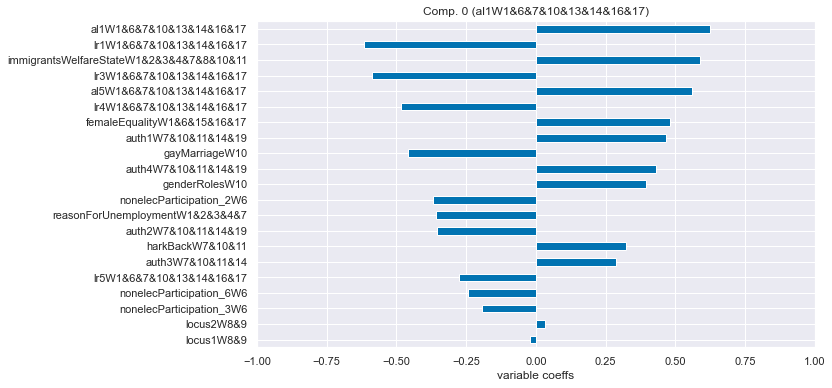

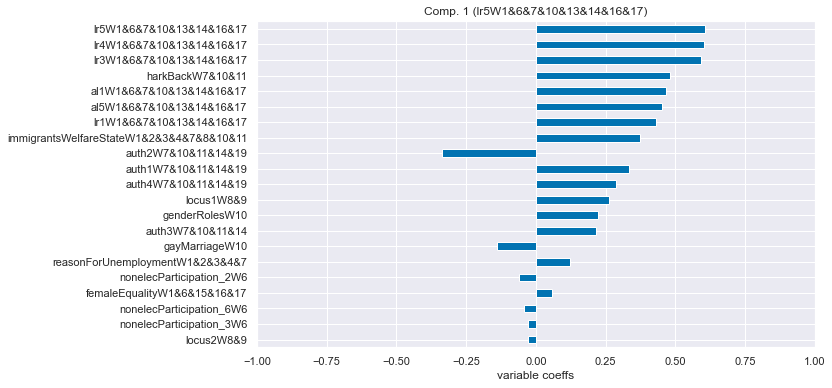

In [33]:
%%time
Treatment = "Trying To Replicate More In Common"
output_folder = "C:\\Users\\Marios\\Documents\\GitHub\\BES_analysis\\output\\BES_analysis_output"
output_subfolder = output_folder + Treatment + os.sep
if not os.path.exists( output_subfolder ):
    os.makedirs( output_subfolder )
    


input_df = df_num

# input_df = input_df.sample(frac=.1,axis=1)

decomp_index = input_df.index
decomp_columns = input_df.columns

# decomp_columns = [str(x) for x in decomp_columns]

clean_feature_set_std = StandardScaler().fit_transform(input_df.values )
decomp_std = pd.DataFrame(   clean_feature_set_std,
                             columns = decomp_columns,
                             index   = decomp_index     )



# n_components = decomp_std.shape[1]
n_components = 2
# (svd_solver='full', n_components='mle',whiten=True)
# decomp = PCA(n_components = n_components,svd_solver='full')
# decomp = FastICA(algorithm='deflation', fun='exp', fun_args=None, max_iter=1000,
#     n_components=None, random_state=None, tol=0.07, w_init=None, whiten=False) # 2h 1min 4s "fast"
# decomp = SparsePCA(n_components=n_components, alpha=1,max_iter=1000,n_jobs=4,tol=1e-10, verbose=True) # 5min
#
# alpha=2 -> 1hr

decomp = FactorAnalysis(n_components = n_components) ## ~10s ,n_components=30 -> 1.5 hrs
# decomp = PCA(n_components = n_components)
# decomp_method = str(decomp).split("(")[0] 
# ,n_components=30

X_r = decomp.fit_transform(decomp_std)

BES_decomp = pd.DataFrame(   X_r,
                             columns = range(0,n_components),
                             index   = decomp_index)
decomp_method = str(decomp).split("(")[0] 
subdir = output_subfolder + decomp_method

(BES_decomp, comp_labels, comp_dict) = display_components(n_components, decomp,
                                                          decomp_columns, BES_decomp, manifest=None, 
                                                          save_folder = subdir,  
                                                          show_first_x_comps= 4, show_histogram = False)

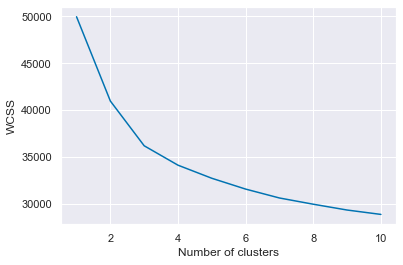

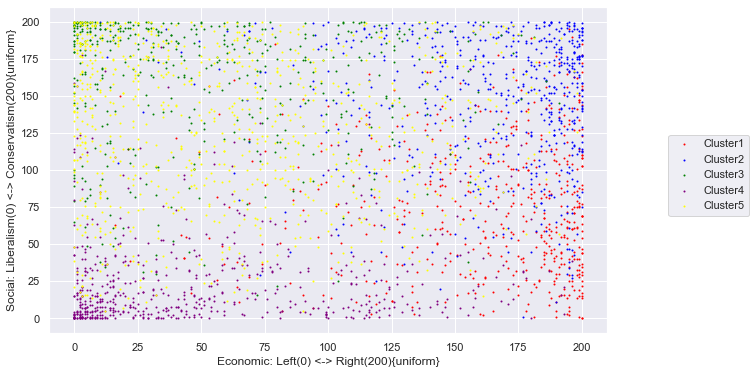

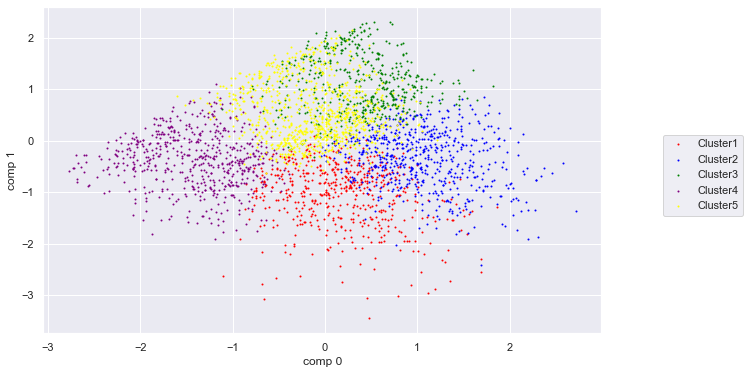

Wall time: 3.91 s


4    842
1    601
3    575
0    539
2    470
dtype: int64

In [102]:
%%time
n_clusters = 5


# X = df_simp_imp
X = df_num
#.apply(lambda x: x.cat.codes if x.dtype=='category' else x)

values_x = pan_dataset_allr_values.columns[0]
values_y = pan_dataset_allr_values.columns[1]
value_df = pan_dataset_allr_values.loc[X.index]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# X.columns = [0,1]
# X = X.values

kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", random_state = 42)
y = kmeans.fit_predict(X)

colour_list=  ['red','blue','green','purple','yellow','orange','black','cyan','pink']

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(value_df.loc[y == cluster, values_x], value_df.loc[y == cluster, values_y],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel(pan_dataset_allr_values.columns[0])
plt.ylabel(pan_dataset_allr_values.columns[1])
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(BES_decomp.loc[y == cluster, 0], BES_decomp.loc[y == cluster, 1],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel("comp 0")
plt.ylabel("comp 1")
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.show()
pd.Series(y).value_counts()

In [103]:
MiC_clusters = pd.Series(y,index=df_num.index)
MiC5 = MiC_clusters.copy()

In [122]:
%%time
al_scale = amalgamate_waves(BES_Panel,"al_scale",low_priority_values=["Don't know"])
lr_scale = amalgamate_waves(BES_Panel,"lr_scale",low_priority_values=["Don't know"])
lr_scale = lr_scale.cat.codes.replace(-1,np.nan)
al_scale = al_scale.cat.codes.replace(-1,np.nan)

Amalgamating variables: 
{1: 'al_scaleW1_W5', 6: 'al_scaleW6', 7: 'al_scaleW7_W9', 10: 'al_scaleW10_W12', 13: 'al_scaleW13', 14: 'al_scaleW14W15', 16: 'al_scaleW16', 17: 'al_scaleW17'} ['al_scaleW1_W5', 'al_scaleW6', 'al_scaleW7_W9', 'al_scaleW10_W12', 'al_scaleW13', 'al_scaleW14W15', 'al_scaleW16', 'al_scaleW17']
Amalgamating variables: 
{1: 'lr_scaleW1_W5', 6: 'lr_scaleW6', 7: 'lr_scaleW7_W9', 10: 'lr_scaleW10_W12', 13: 'lr_scaleW13', 14: 'lr_scaleW14W15', 16: 'lr_scaleW16', 17: 'lr_scaleW17'} ['lr_scaleW1_W5', 'lr_scaleW6', 'lr_scaleW7_W9', 'lr_scaleW10_W12', 'lr_scaleW13', 'lr_scaleW14W15', 'lr_scaleW16', 'lr_scaleW17']
Wall time: 3min 40s


In [127]:
lr_scale = lr_scale.fillna(lr_scale.mean())
al_scale = al_scale.fillna(al_scale.mean())

In [95]:
df_num

,lr1W1&6&7&10&13&14&16&17,lr3W1&6&7&10&13&14&16&17,lr4W1&6&7&10&13&14&16&17,lr5W1&6&7&10&13&14&16&17,al1W1&6&7&10&13&14&16&17,al5W1&6&7&10&13&14&16&17,locus1W8&9,locus2W8&9,reasonForUnemploymentW1&2&3&4&7,auth1W7&10&11&14&19,...,auth3W7&10&11&14,auth4W7&10&11&14&19,harkBackW7&10&11,immigrantsWelfareStateW1&2&3&4&7&8&10&11,femaleEqualityW1&6&15&16&17,gayMarriageW10,genderRolesW10,nonelecParticipation_2W6,nonelecParticipation_3W6,nonelecParticipation_6W6
17,0,2,2,4,4,4,4,4,1,1,...,1,0,3,3,2,3,2,1,0,0
41,3,4,4,4,2,4,3,3,1,1,...,0,1,1,1,1,3,1,1,0,0
42,2,3,3,3,4,3,3,2,2,0,...,0,1,3,3,3,3,1,0,0,0
43,1,2,2,2,3,3,3,2,2,1,...,0,1,1,3,2,3,0,0,0,0
57,2,3,2,3,2,3,3,3,2,0,...,0,0,2,3,2,4,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42682,3,1,4,4,3,3,3,1,4,1,...,1,1,3,3,1,2,2,1,0,0
42775,4,4,3,1,3,4,1,2,1,1,...,1,1,1,2,2,4,1,0,0,0
42799,3,3,3,4,2,2,3,3,3,0,...,0,1,2,1,1,4,0,1,0,0
42820,3,3,3,1,2,1,4,2,3,0,...,0,0,2,0,1,4,0,0,0,0


In [ ]:
## overlap between al_scale non-nulls and df_num non-nulls is almost perfect

KeyError: 7

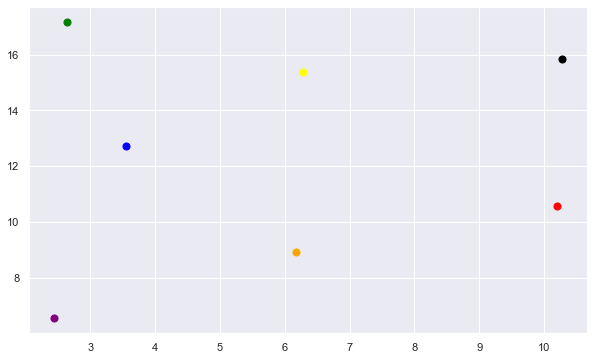

In [128]:
plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(lr_scale.loc[df_num.index].groupby(y).mean().loc[cluster],
                al_scale.loc[df_num.index].groupby(y).mean().loc[cluster],
                s = 50, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlim([0,20]);
plt.ylim([0,20]);
plt.legend()

In [ ]:
plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(value_df[values_x].groupby(y).mean().loc[cluster], value_df[values_y].groupby(y).mean().loc[cluster],
                s = 50, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel(pan_dataset_allr_values.columns[0])
plt.ylabel(pan_dataset_allr_values.columns[1])
plt.legend(bbox_to_anchor =(1.1,.625)) 

In [1]:
# value_df

In [ ]:
## cluster 3 - Progressive Activists?
## cluster 5 - Established Liberals
## cluster 1 - Civic Pragmatists
## cluster 2 - Disengaged Battlers
## cluster 4 - Backbone Conservatives
## cluster 7 - Disengaged Traditionalists
## cluster 6 - Loyal Nationals

In [149]:
pd.crosstab(y+1,pan_dataset_votes.loc[df_num.index,"2016EUVote_complete"],normalize='index')

2016EUVote_complete,LEAVE,REMAIN,DNV,UNK
row_0,,,,
1,0.268707,0.698980,0.032313,0.000000
2,0.778068,0.167102,0.054830,0.000000
3,0.049550,0.905405,0.042793,0.002252
4,0.720317,0.253298,0.026385,0.000000
5,0.308782,0.637394,0.053824,0.000000
6,0.630607,0.337731,0.031662,0.000000
7,0.654691,0.293413,0.049900,0.001996


In [144]:
## not so happy with pacmap!
import umap
import trimap
from sklearn.metrics import davies_bouldin_score

Index(['2005GEVote', '2005GEVote_complete', '2005GEVote_simple', '2010GEVote',
       '2010GEVote_complete', '2010GEVote_simple', '2015GEVote',
       '2015GEVote_complete', '2015GEVote_simple', '2017GEVote',
       '2017GEVote_complete', '2017GEVote_simple', '2019GEVote',
       '2019GEVote_complete', '2019GEVote_simple', '2016EUVote',
       '2016EUVote_complete', '2016EUVote_simple', '2014EEVote',
       '2014EEVote_complete', '2014EEVote_simple', '2019EEVote',
       '2019EEVote_complete', '2019EEVote_simple', '2014SCOTREF',
       '2014SCOTREF_complete', '2014SCOTREF_simple', '2014LE',
       '2014LE_complete', '2014LE_simple', '2015LE', '2015LE_complete',
       '2015LE_simple', '2016LE', '2016LE_complete', '2016LE_simple', '2017LE',
       '2017LE_complete', '2017LE_simple', '2018LE', '2018LE_complete',
       '2018LE_simple', '2019LE', '2019LE_complete', '2019LE_simple',
       '2011SEC', '2011SEC_complete', '2011SEC_simple', '2011SEL',
       '2011SEL_complete', '2011SEL_simpl

In [2]:
# # %%time
# import pacmap

# # initializing the pacmap instance
# # Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
# embedding = pacmap.PaCMAP(n_components=2, n_neighbors=69+2, MN_ratio=0.4313108811895139,
#                           FP_ratio=2.6105411700522474, apply_pca=True, lr=1.080342470192178) 

# X_std = StandardScaler().fit_transform(X)
# # fit the data (The index of transformed data corresponds to the index of the original data)
# X_transformed = embedding.fit_transform(X_std, init="pca")

# # visualize the embedding
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# # ax.scatter(X_transformed[:, 0], X_transformed[:, 1],
# #            cmap="Spectral",
# #            c=y_test, s=0.6)
# sns.scatterplot(x=X_transformed[:, 0], y=X_transformed[:, 1],
# #            cmap="Spectral",
#            palette=sns.color_palette("hls", 7),
#            hue=y, s=20,alpha=.7)

# print(davies_bouldin_score(X_transformed, y))

0.9289440125150162
Wall time: 6.11 s


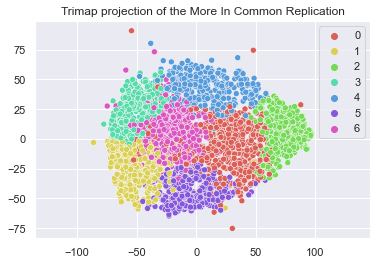

In [138]:
%%time
# {'distance': 0, 'lr': 0.6693581495232805, 'n_inliers': 15.0, 'n_outliers': 1.0,
#  'n_random': 4.0, 'standardization': 0, 'weight_temp': 0.0739833629830095}
# {'distance': 0, 'lr': 0.2958263075863433, 'n_inliers': 19.0, 'n_outliers': 9.0, 
#  'n_random': 4.0, 'standardization': 0, 'weight_temp': 0.4357122843420691}
embedding = trimap.TRIMAP(distance='euclidean',lr=.2958263075863433,n_inliers=19+2,n_outliers=9+1,n_random=4+1,
                          weight_temp=.4357122843420691)\
                    .fit_transform(X.values)

sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1],
                hue=y,
                palette=sns.color_palette("hls", n_clusters)).set(title="Trimap projection of the More In Common Replication") 

plt.gca().set_aspect('equal', 'datalim')
print(davies_bouldin_score(embedding, y))

In [9]:
# sns.color_palette("hls", n_clusters)

In [137]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

def hyperopt_train_test(params):
    
    if params["standardization"]:
        X = StandardScaler().fit_transform(df_num)
    else:
        X = df_num.copy().values
    #**{k:v for k,v in params.items() if k!='standardization'}
    print(params)
    return davies_bouldin_score(trimap.TRIMAP(n_inliers=int(params['n_inliers']),
                                              n_outliers=int(params['n_outliers']),
                                              n_random=int(params['n_random']),
                                              weight_temp=params['weight_temp'],
                                              lr=params['lr'],
                                              n_iters=params['n_iters'],
                                              distance=params['distance'],
                                              n_dims=params['n_dims'],
                                             )\
                                    .fit_transform(X),
                                        y)

space4knn = {
      'n_inliers': hp.quniform('n_inliers', 2,20,1),
      'n_outliers': hp.quniform('n_outliers', 1,10,1),
      'n_random': hp.quniform('n_random', 1,5,1),
      'weight_temp':hp.uniform('weight_temp', 0.0,0.99),
      'lr':hp.uniform('lr', 0.01,0.99),
      'n_iters':400,
      'distance':hp.choice('distance', ['euclidean','manhattan','angular']),
    # ,'hamming' may be bugged?
      # metric - quite a big list here!
      'n_dims': 2,
    
      'standardization':hp.choice('standardization', [False,True]),
}
def f(params):
    clusteringness = hyperopt_train_test(params)
    return {'loss': clusteringness, 'status': STATUS_OK}

trials = Trials()
best = fmin(f, space4knn, algo=tpe.suggest, max_evals=100, trials=trials)
print('best:')
print(best)

{'distance': 'manhattan', 'lr': 0.4114937768751938, 'n_dims': 2, 'n_inliers': 5.0, 'n_iters': 400, 'n_outliers': 6.0, 'n_random': 5.0, 'standardization': True, 'weight_temp': 0.5408793684841755}
{'distance': 'angular', 'lr': 0.9076886535503799, 'n_dims': 2, 'n_inliers': 8.0, 'n_iters': 400, 'n_outliers': 3.0, 'n_random': 3.0, 'standardization': True, 'weight_temp': 0.9779156241380232}
{'distance': 'manhattan', 'lr': 0.2197539358766343, 'n_dims': 2, 'n_inliers': 16.0, 'n_iters': 400, 'n_outliers': 6.0, 'n_random': 4.0, 'standardization': True, 'weight_temp': 0.8450390465665243}
{'distance': 'euclidean', 'lr': 0.5040345082459036, 'n_dims': 2, 'n_inliers': 2.0, 'n_iters': 400, 'n_outliers': 3.0, 'n_random': 5.0, 'standardization': False, 'weight_temp': 0.13513935557541357}
{'distance': 'angular', 'lr': 0.14883965147192593, 'n_dims': 2, 'n_inliers': 4.0, 'n_iters': 400, 'n_outliers': 7.0, 'n_random': 2.0, 'standardization': False, 'weight_temp': 0.7934751749479967}
{'distance': 'manhattan'

{'distance': 'euclidean', 'lr': 0.09340144287760543, 'n_dims': 2, 'n_inliers': 3.0, 'n_iters': 400, 'n_outliers': 8.0, 'n_random': 2.0, 'standardization': False, 'weight_temp': 0.0945257492521768}
{'distance': 'manhattan', 'lr': 0.989373972490889, 'n_dims': 2, 'n_inliers': 19.0, 'n_iters': 400, 'n_outliers': 6.0, 'n_random': 3.0, 'standardization': True, 'weight_temp': 0.660975983132871}
{'distance': 'euclidean', 'lr': 0.02879015896217474, 'n_dims': 2, 'n_inliers': 10.0, 'n_iters': 400, 'n_outliers': 7.0, 'n_random': 4.0, 'standardization': False, 'weight_temp': 0.1714157171916448}
{'distance': 'euclidean', 'lr': 0.24793769983922326, 'n_dims': 2, 'n_inliers': 17.0, 'n_iters': 400, 'n_outliers': 4.0, 'n_random': 5.0, 'standardization': True, 'weight_temp': 0.045030599761908874}
{'distance': 'angular', 'lr': 0.7665677463817209, 'n_dims': 2, 'n_inliers': 16.0, 'n_iters': 400, 'n_outliers': 5.0, 'n_random': 4.0, 'standardization': False, 'weight_temp': 0.2569781726912729}
{'distance': 'man

In [15]:
# from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

# def hyperopt_train_test(params):
    
#     embedding = pacmap.PaCMAP(**{k:v for k,v in params.items() if "init" not in k})

# # fit the data (The index of transformed data corresponds to the index of the original data)
#     X_transformed = embedding.fit_transform(X_test.values, init=params["init"])
    
#     return davies_bouldin_score(X_transformed, y_test)

# space4knn = {
# #     'n_neighbors': hp.choice('n_neighbors', range(1,50))
#     'n_components': 2,
#     'n_neighbors':hp.choice('n_neighbors', range(2,150)),
#     'MN_ratio':hp.uniform('MN_ratio', .15, .85),
#     #0.5,
#     'FP_ratio':hp.uniform('FP_ratio', 1.25, 3.0),
# #     'apply_pca':True,
#     'apply_pca':hp.choice('apply_pca', [True,False]),
#     'lr':hp.uniform('lr', .5, 1.5),
# #     1.0,
# #     'init':'pca',
    
#     'init':hp.choice('init', ['pca','random']),
    
    
# }
# def f(params):
#     clusteringness = hyperopt_train_test(params)
#     return {'loss': clusteringness, 'status': STATUS_OK}

# trials = Trials()
# best = fmin(f, space4knn, algo=tpe.suggest, max_evals=150, trials=trials)
# print('best:')
# print(best)

In [ ]:
## so, now we want to test how good MiC clusters are than Surridge clusters for predicting voting behaviour

## do we need to go through xgboost? Don't we just need some sense of variance for each party vote across clusters?

In [68]:
MiC_clusters = pd.Series(y,index=df_num.index)

In [41]:
search(pan_dataset_votes,"2019")

2019GEVote             31784
2019GEVote_complete    97006
2019GEVote_simple      96529
2019EEVote             47902
2019EEVote_complete    97006
2019EEVote_simple      96529
2019LE                 23403
2019LE_complete        97006
2019LE_simple          96529
dtype: int64

In [46]:
replace_dict = {'UNK':np.nan, 'CNV':np.nan, 'DNV':"DNV", 'LAB':"LAB", 'CON':"CON", 'TYTV(Maybe)':np.nan, 'TYTV(Def)':np.nan,
                 'LD':"LD", 'UKIP':"UKIP", 'OTH':np.nan, 'GP':"GP", 'Not Present':np.nan,
                 'SNP':"SNP", 'DK':np.nan, 'PC':"PC", 'BNP':np.nan}
pan_dataset_votes["2019GEVote_complete"].loc[MiC_clusters.index].replace(replace_dict).value_counts()

CON    725
LAB    422
LD     192
DNV    118
SNP    100
BXP     44
GP      31
PC      15
Name: 2019GEVote_complete, dtype: int64

In [48]:
replace_dict = {'UNK':np.nan, 'CNV':np.nan, 'DNV':"DNV", 'LAB':"Lib-Left", 'CON':"Auth-Right", 'TYTV(Maybe)':np.nan, 'TYTV(Def)':np.nan,
                 'LD':"Lib-Left", 'UKIP':"Auth-Right", 'OTH':np.nan, 'GP':"Lib-Left", 'Not Present':np.nan,
                 'SNP':"Lib-Left", 'DK':np.nan, 'PC':"Lib-Left", 'BNP':np.nan, "BXP":"Auth-Right"}
pan_dataset_votes["2019GEVote_complete"].loc[MiC_clusters.index].replace(replace_dict).value_counts()

Auth-Right    769
Lib-Left      760
DNV           118
Name: 2019GEVote_complete, dtype: int64

In [69]:
vc = pan_dataset_votes["2019GEVote_complete"].loc[MiC_clusters.index].replace(replace_dict).groupby(MiC_clusters).value_counts(normalize=True)
vc.name='vc'
vc = vc.reset_index()

In [70]:
vc[vc["2019GEVote_complete"]=="Lib-Left"]["vc"].var()

0.10143325074795317

In [71]:
vc

,level_0,2019GEVote_complete,vc
0,0,Auth-Right,0.913580
1,0,Lib-Left,0.055556
2,0,DNV,0.030864
3,1,Lib-Left,0.844720
4,1,Auth-Right,0.118012
5,1,DNV,0.037267
6,2,Auth-Right,0.555046
7,2,Lib-Left,0.339450
8,2,DNV,0.105505
9,3,Auth-Right,0.714286


In [79]:
value_df

,Economic: Left(0) <-> Right(200){uniform},Social: Liberalism(0) <-> Conservatism(200){uniform},Economic: Left <-> Right{gaussian-ish},Social: Liberalism <-> Conservatism{gaussian-ish},Economic: Left <-> Right{gaussian-ish}completish,Economic: Left <-> Right{gaussian-ish}complete,Social: Liberalism <-> Conservatism{gaussian-ish}completish,Social: Liberalism <-> Conservatism{gaussian-ish}complete,Economic: Left <-> Right{gaussian-ish}complete_fully,Social: Liberalism <-> Conservatism{gaussian-ish}complete_fully
17,195.0,187.0,2.002561,1.489516,2.002561,2.002561,1.489516,1.489516,2.002561,1.489516
41,16.0,109.0,-1.421049,0.148603,-1.421049,-1.421049,0.148603,0.148603,-1.421049,0.148603
42,129.0,135.0,0.366943,0.509512,0.366943,0.366943,0.509512,0.509512,0.366943,0.509512
43,195.0,110.0,1.962048,0.160426,1.962048,1.962048,0.160426,0.160426,1.962048,0.160426
57,65.0,44.0,-0.422286,-0.817388,-0.422286,-0.422286,-0.817388,-0.817388,-0.422286,-0.817388
...,...,...,...,...,...,...,...,...,...,...
42682,32.0,83.0,-0.989465,-0.196957,-0.989465,-0.989465,-0.196957,-0.196957,-0.989465,-0.196957
42775,84.0,118.0,-0.175972,0.280211,-0.175972,-0.175972,0.280211,0.280211,-0.175972,0.280211
42799,21.0,88.0,-1.279203,-0.134018,-1.279203,-1.279203,-0.134018,-0.134018,-1.279203,-0.134018
42820,99.0,4.0,0.001591,-2.009305,0.001591,0.001591,-2.009305,-2.009305,0.001591,-2.009305


In [133]:
X

,0,1
17,9.0,18.0
41,1.0,15.0
42,6.0,15.0
43,11.0,13.0
57,7.0,8.0
...,...,...
42682,4.0,13.0
42775,4.0,16.0
42799,3.0,6.0
42820,6.0,5.0


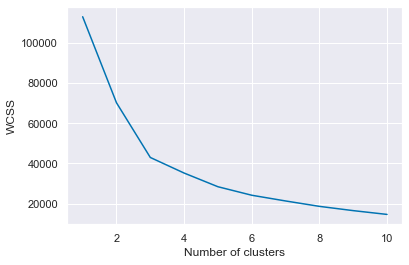

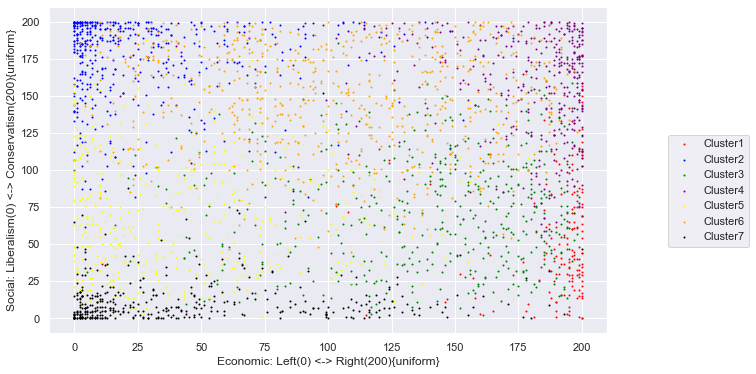

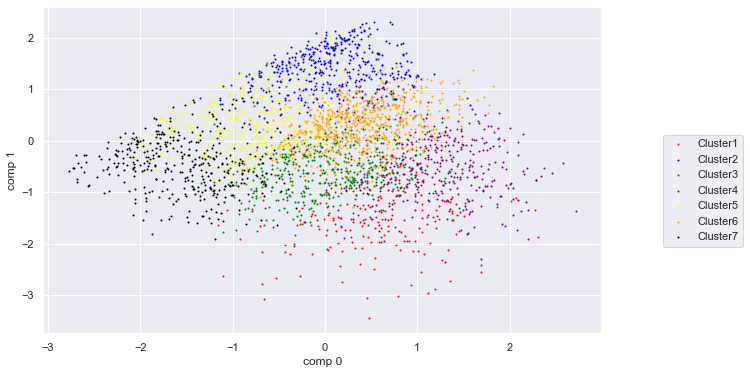

5    697
2    496
1    470
4    414
6    386
3    386
0    178
dtype: int64

In [135]:
# %%time
n_clusters = 7

# X = df_simp_imp
# X = df_num
#.apply(lambda x: x.cat.codes if x.dtype=='category' else x)



# X = value_df[[values_x,values_y]]
X = pd.concat([lr_scale.loc[df_num.index],al_scale.loc[df_num.index]],axis=1)

values_x = pan_dataset_allr_values.columns[0]
values_y = pan_dataset_allr_values.columns[1]
value_df = pan_dataset_allr_values.loc[X.index]

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# X.columns = [0,1]
# X = X.values

kmeans = KMeans(n_clusters = n_clusters, init = "k-means++", random_state = 42)
y = kmeans.fit_predict(X)

colour_list=  ['red','blue','green','purple','yellow','orange','black','cyan','pink']

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(value_df.loc[y == cluster, values_x], value_df.loc[y == cluster, values_y],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel(pan_dataset_allr_values.columns[0])
plt.ylabel(pan_dataset_allr_values.columns[1])
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.figure(figsize=(10,6));
for cluster in range(0,n_clusters):
    plt.scatter(BES_decomp.loc[y == cluster, 0], BES_decomp.loc[y == cluster, 1],
                s = 1, c = colour_list[cluster], label = 'Cluster'+str(cluster+1))
    
plt.xlabel("comp 0")
plt.ylabel("comp 1")
plt.legend(bbox_to_anchor =(1.1,.625)) 

plt.show()
pd.Series(y).value_counts()

In [136]:
MiC_clusters = pd.Series(y,index=df_num.index)
SurrClustScale7 = MiC_clusters.copy()

In [75]:
MiC_clusters = pd.Series(y,index=df_num.index)

vc = pan_dataset_votes["2019GEVote_complete"].loc[MiC_clusters.index].replace(replace_dict).groupby(MiC_clusters).value_counts(normalize=True)
vc.name='vc'
vc = vc.reset_index()

vc[vc["2019GEVote_complete"]=="Lib-Left"]["vc"].var()

0.07877738897358663

In [76]:
vc

,level_0,2019GEVote_complete,vc
0,0,Auth-Right,0.711864
1,0,Lib-Left,0.203390
2,0,DNV,0.084746
3,1,Lib-Left,0.522727
4,1,Auth-Right,0.409091
5,1,DNV,0.068182
6,2,Lib-Left,0.900452
7,2,DNV,0.058824
8,2,Auth-Right,0.040724
9,3,Lib-Left,0.853448


In [80]:
SurrClustHarm = MiC_clusters.copy()

In [ ]:
### manually specific clusters

In [161]:
def surridge_lr_scale(x,centre_cutoff,right_cutoff):
    if pd.isnull(x):
        return np.nan
    
    if x<centre_cutoff:
        return "Left"
    elif x<right_cutoff:
        return "Centre"
    else:
        return "Right"
    
def surridge_al_scale(x,centre_cutoff,right_cutoff):
    if pd.isnull(x):
        return np.nan
    
    if x<centre_cutoff:
        return "Liberal"
    elif x<right_cutoff:
        return "Moderate"
    else:
        return "Authoritarian"

# al_lr_scale = BES_Panel[["lr_scaleW17","al_scaleW17"]].apply(lambda x: x.cat.codes).replace(-1,np.nan)  
al_lr_scale = pd.concat([lr_scale.loc[df_num.index],al_scale.loc[df_num.index]],axis=1)
al_lr_scale.columns = ["lr_scaleW17","al_scaleW17"]
al_lr_scale["lr_scaleW17"] = al_lr_scale["lr_scaleW17"].apply(lambda x: surridge_lr_scale(x, 6,11) )
al_lr_scale["al_scaleW17"] = al_lr_scale["al_scaleW17"].apply(lambda x: surridge_al_scale(x, 10,15 ) )



cats = (al_lr_scale["lr_scaleW17"]+"-"+al_lr_scale["al_scaleW17"]).astype('category')

cats = cats.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)

# wts = BES_Panel["wt_new_W17"]
# mask = cats.notnull() & wts.notnull()
# wvc = weighted_value_counts(cats[mask],wts[mask],normalize=True, perc=True,decimal_places=0).sort_index()["weighted_sample_percentage"]

# cats = cats.cat.rename_categories([x+"-("+str(wvc[x])+"%)" for x in cats.cat.categories])

cats.value_counts().sort_index()

Left-Liberal            435
Left-Moderate           395
Left-Authoritarian      593
Centre-Liberal          207
Centre-Moderate         531
Centre-Authoritarian    425
Right-Liberal            74
Right-Moderate          189
Right-Authoritarian     178
dtype: int64

In [164]:
SurrClustScaleEqual = cats.cat.codes

In [179]:
al_lr_scale = pd.concat([lr_scale.loc[df_num.index],al_scale.loc[df_num.index]],axis=1)
al_lr_scale.columns = ["lr_scaleW17","al_scaleW17"]
al_lr_scale["lr_scaleW17"] = al_lr_scale["lr_scaleW17"].apply(lambda x: surridge_lr_scale(x, 6.66,13.33) )
al_lr_scale["al_scaleW17"] = al_lr_scale["al_scaleW17"].apply(lambda x: surridge_al_scale(x, 6.66,13.33) )

cats = (al_lr_scale["lr_scaleW17"]+"-"+al_lr_scale["al_scaleW17"]).astype('category')

cats = cats.cat.reorder_categories([ 'Left-Liberal', 'Left-Moderate','Left-Authoritarian',
    'Centre-Liberal', 'Centre-Moderate','Centre-Authoritarian',
        'Right-Liberal', 'Right-Moderate','Right-Authoritarian',],ordered=True)

cats.value_counts().sort_index()

Left-Liberal            269
Left-Moderate           651
Left-Authoritarian      814
Centre-Liberal           64
Centre-Moderate         513
Centre-Authoritarian    549
Right-Liberal            10
Right-Moderate           76
Right-Authoritarian      81
dtype: int64

In [180]:
SurrClustScaleAbs = cats.cat.codes

In [ ]:
##### some measure of MP directed racism x party vote

In [187]:
(BES_Panel[search(BES_Panel,"moreParl").index]=="Yes").sum()

# moreParl_1 People who come from the area they represent
# moreParl_2 Working-class people
# moreParl_3 Women
# moreParl_4 People with disabilities
# moreParl_5 Young people under 30
# moreParl_6 Ethnic minorities
# moreParl_7 Christians
# moreParl_8 Gay, lesbian, bisexual or, transgender people (LGBT)
# moreParl_9 Muslims
# moreParl_10 People with university degrees
# moreParl_111 None of these

moreParl_1W14      4086
moreParl_2W14      2910
moreParl_3W14       925
moreParl_4W14       645
moreParl_5W14       646
moreParl_6W14       338
moreParl_7W14       447
moreParl_8W14       276
moreParl_9W14        71
moreParl_10W14      341
moreParl_111W14     517
dtype: int64

In [210]:
df_short = BES_Panel[search(BES_Panel,"PropMP").index].replace("Don't know",np.nan).replace("0 - None of them",0).replace("100 - All of them",100).astype(float)
#.dropna().astype(float).mean()

In [211]:
df_short.groupby(pan_dataset_votes["2019GEVote_complete"]).mean()

,propMPLocalW14,propMPWCW14,propMPFemaleW14,propMPDisabW14,propMPYoungW14,propMPRaceW14,propMPChristW14,propMPLGBTW14,propMPMuslimW14,propMPDegreeW14
2019GEVote_complete,,,,,,,,,,
BXP,28.125000,22.972603,34.090909,11.472973,18.430556,27.657143,46.246154,21.796296,25.215385,63.822785
CON,31.610007,25.555556,34.721583,11.667169,17.380220,23.131477,47.512695,17.064722,19.127172,66.810015
DK,29.578947,28.666667,35.473684,11.812500,20.555556,27.285714,52.250000,16.230769,21.692308,60.833333
GP,30.656566,22.786408,31.490385,7.633663,14.801980,18.202128,50.395349,14.402299,13.230769,71.660194
LAB,30.669192,21.940964,33.022782,10.628954,16.106042,19.750000,51.550859,14.932976,15.308767,71.607311
LD,33.523438,23.737113,32.076355,9.104326,14.546599,20.379221,47.380556,14.631579,15.160428,68.638821
OTH,29.600000,21.574074,34.142857,13.037037,19.745455,22.944444,48.255319,20.125000,15.791667,66.684211
PC,27.117647,24.222222,35.421053,12.833333,14.333333,20.368421,51.125000,16.333333,14.882353,69.263158
SNP,34.666667,24.053846,34.732824,9.465116,16.709924,19.688525,50.964912,18.763158,13.586777,70.830769


In [208]:
search(pan_dataset_votes,"2019")

2019GEVote             31784
2019GEVote_complete    97006
2019GEVote_simple      96529
2019EEVote             47902
2019EEVote_complete    97006
2019EEVote_simple      96529
2019LE                 23403
2019LE_complete        97006
2019LE_simple          96529
dtype: int64